In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns; sns.set()

We can load the dataset as a pandas DataFrame directly from the URL; for example:

In [2]:
df = pd.read_csv('D:dataset/zzzxxxll.csv',header=None,sep=',')
print(df.shape)
# print(df)

(1372, 5)


Next, we can learn more about the dataset by looking at summary statistics and a plot of the data.

In [4]:
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.tail()

,0,1,2,3,4
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


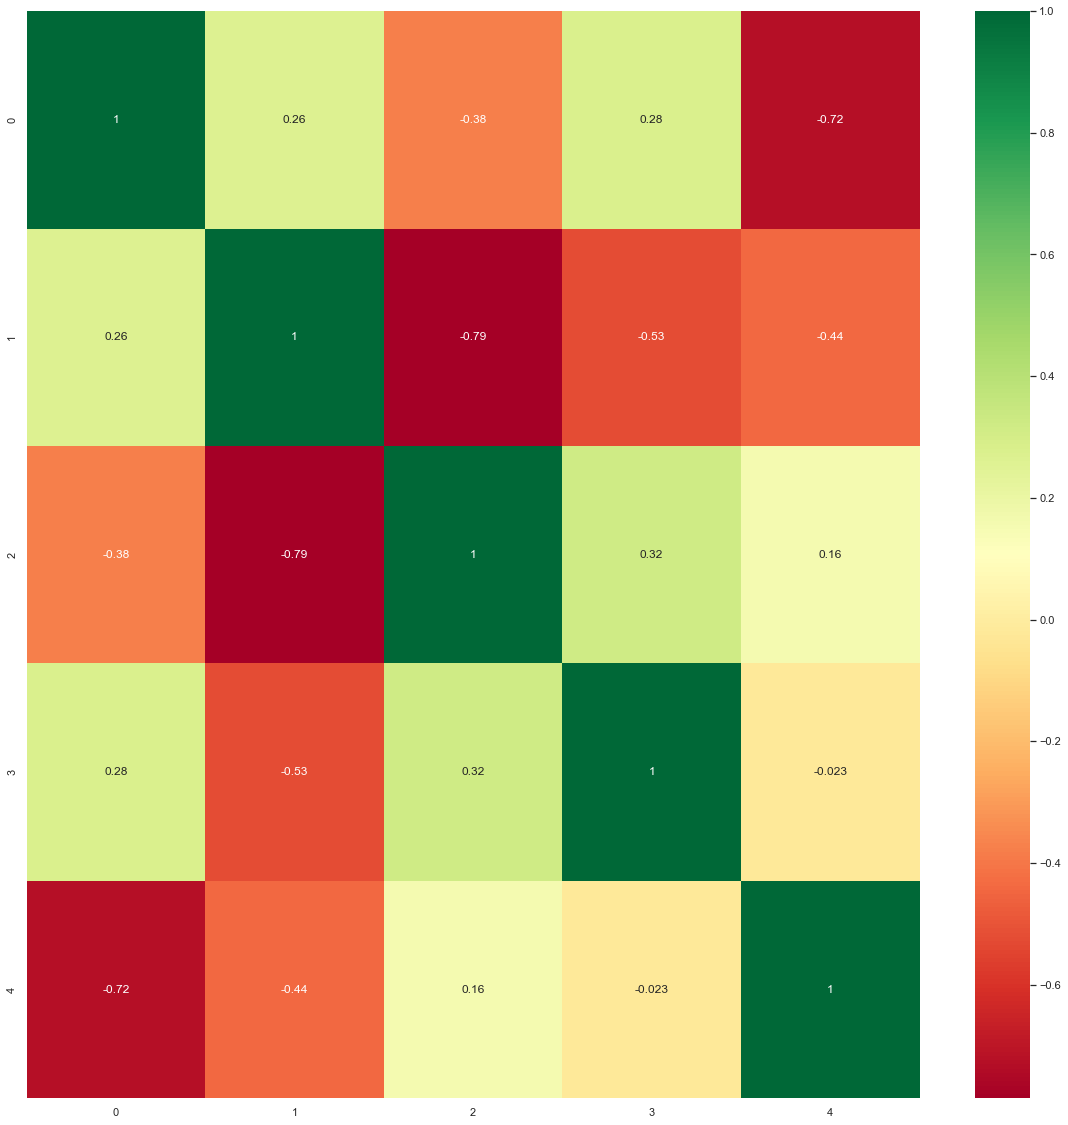

In [6]:
corrmat = df.corr()
# plot heat map
top_corr_features=corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.drop_duplicates()

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Drupna indique que si la table dans la base de données est vide, elle supprime ou équilibre la table afin que les données puissent être synchronisées. 

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1367    False
1368    False
1369    False
1370    False
1371    False
Length: 1372, dtype: bool

In [10]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [13]:
df.dropna()

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [14]:
X = df.values[:, 0:4]
y = df.values[:, 4]
# print(X)
print(y)

[0. 0. 0. ... 1. 1. 1.]


First, we must ensure all input variables are floating-point values and encode the target label as integer values 0 and 1.

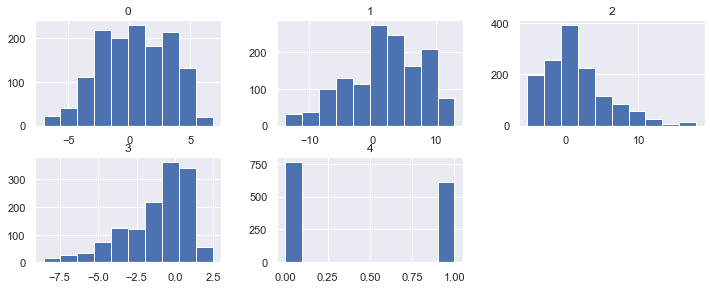

In [15]:
df.hist(figsize=(12, 12),layout=(5, 3));

In [16]:
df.corr()

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [17]:
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

Next, we can split the dataset into input and output variables, then into 67/33 train and test sets

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=33,random_state=42)

We can define a minimal MLP model. In this case, we will use one hidden layer with 10 nodes and one output layer (chosen arbitrarily). We will use the ReLU activation function in the hidden layer and the “he_normal” weight initialization, as together, they are a good practice.

The output of the model is a sigmoid activation for binary classification and we will minimize binary cross-entropy loss.

In [19]:
n_features = X.shape[1]
model = Sequential()
model.add(Dense(10,activation='relu',kernel_initializer='he_normal',input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid',))
model.compile(optimizer='RMSprop', loss='mse')

We will fit the model for 50 training epochs (chosen arbitrarily) with a batch size of 32 because it is a small dataset.

We are fitting the model on raw data, which we think might be a good idea, but it is an important starting point

In [20]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test,y_test))

At the end of training, we will evaluate the model’s performance on the test dataset and report performance as the classification accuracy.

In [21]:
ypred = model.predict(X_test)
yhat = (ypred > 0.5).flatten().astype(int)
score = accuracy_score(y_test,yhat)
print('Accuracy: %.3f' % score)

2/2 [==============================] - 0s 10ms/step
Accuracy: 1.000


Finally, we will plot learning curves of the cross-entropy loss on the train and test sets during training.

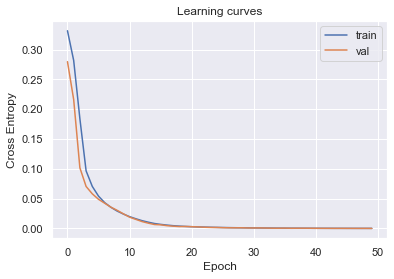

In [22]:
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend(loc= 'best')
plt.show()

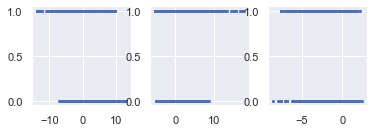

In [23]:
plt.subplot(2,3,1)
plt.scatter(X_train[:,1],y_train,s=4)
plt.subplot(2,3,2)
plt.scatter(X_train[:,2],y_train, s=4)
plt.subplot(2,3,3)
plt.scatter(X_train[:,3],y_train, s=4)

plt.show()
